<h2>Convolutional Neural Networks with Keras</h2>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>


<a id='item41'></a>


## Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [2]:
# Import necessary libraries for data manipulation, visualization, and model building
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For advanced and aesthetically pleasing plots
from sklearn.metrics import confusion_matrix  # To evaluate model predictions using a confusion matrix
import keras
from keras.models import Sequential  # Sequential API for model creation
from keras.layers import Dense  # Fully connected layers for classification
from keras.utils import to_categorical  # Converts labels to one-hot encoding
from keras.layers import Conv2D  # Adds convolutional layers for feature extraction
from keras.layers import MaxPooling2D  # Adds pooling layers to reduce feature map dimensions
from keras.layers import Flatten  # Flattens 2D feature maps into 1D for the fully connected layers

2025-01-10 09:30:54.737384: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-10 09:30:54.917999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-10 09:30:55.132713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 09:30:55.280342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 09:30:55.320611: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 09:30:55.568796: I tensorflow/core/platform/cpu_feature_gu

- Conv2D layers are used to identify spatial features in input data (e.g., edges, textures).
- MaxPooling2D reduces the size of the feature maps to make the model computationally efficient.
- Flatten converts multidimensional arrays to a single dimension for dense layers.

<a id='item42'></a>


## Convolutional Layer with One set of convolutional and pooling layers


### Data Loading and Preprocessing

In [14]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

This section loads and preprocesses the MNIST dataset, a standard dataset of handwritten digits. The steps involved are:

- Data Loading:
The dataset is split into training and testing sets:

- Reshaping:
The images are reshaped to include a channel dimension for compatibility with convolutional layers.
MNIST images are grayscale, so the channel dimension is set to 1.
The format becomes (samples, pixels, width, height).

- Type Conversion:
The pixel values are converted to 32-bit floating-point numbers (float32), a standard format for deep learning computations.

### Normalization Of Data


In [16]:
# Normalize the training and testing image data to the range [0, 1]
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

- Normalized data helps the neural network learn more effectively.
- This step is critical when using activation functions like ReLU or sigmoid.

### Convert the target variable into binary categories


In [20]:
# Convert the class labels into one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Determine the number of output classes (categories)
num_classes = y_test.shape[1] # number of categories

print(num_classes)

10


- The final layer of the neural network will have the same number of neurons as num_classes.
- One-hot encoding ensures compatibility with loss functions like categorical crossentropy.

### Defining the one set of convolutional and pooling layers.


In [24]:
def convolutional_model():
    
    # Create a Sequential model
    model = Sequential()
    # Add a convolutional layer
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    # Add a max pooling layer to reduce spatial dimensions
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the feature maps to feed into fully connected layers
    model.add(Flatten())
    # Add a dense (fully connected) layer with 100 neurons and ReLU activation
    model.add(Dense(100, activation='relu'))
    # Add the output layer with 'num_classes' neurons and softmax activation
    model.add(Dense(num_classes, activation='softmax'))
    
   # Compile the model with the Adam optimizer and categorical crossentropy loss
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

- The ReLU activation introduces non-linearity, while the softmax activation ensures outputs represent class probabilities.
- The adam optimizer adapts learning rates during training for efficient convergence.

### Reusable Utility Functions and Main Workflow


In [28]:
# Define reusable utility functions
def plot_training_history(history):
    
    # Plots training and validation loss and accuracy curves.
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('single_layer_training_curves.png')
    plt.show()

In [30]:
def plot_confusion_matrix(model, X_test, y_test):
    
    # Plots a confusion matrix for the model's predictions.
    
    predictions = np.argmax(model.predict(X_test), axis=1)
    true_labels = np.argmax(y_test, axis=1)
    cm = confusion_matrix(true_labels, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('single_layer_confusion_matrix.png')
    plt.show()

/home/62f9b1cc-b39d-4589-817c-ad7dac426285/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2025-01-10 09:49:47.578392: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


300/300 - 17s - 55ms/step - accuracy: 0.9237 - loss: 0.2769 - val_accuracy: 0.9712 - val_loss: 0.0976
Epoch 2/10
300/300 - 21s - 69ms/step - accuracy: 0.9773 - loss: 0.0794 - val_accuracy: 0.9811 - val_loss: 0.0577
Epoch 3/10
300/300 - 22s - 72ms/step - accuracy: 0.9841 - loss: 0.0534 - val_accuracy: 0.9849 - val_loss: 0.0445
Epoch 4/10
300/300 - 21s - 70ms/step - accuracy: 0.9880 - loss: 0.0411 - val_accuracy: 0.9871 - val_loss: 0.0396
Epoch 5/10
300/300 - 22s - 73ms/step - accuracy: 0.9898 - loss: 0.0340 - val_accuracy: 0.9851 - val_loss: 0.0413
Epoch 6/10
300/300 - 15s - 51ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9874 - val_loss: 0.0413
Epoch 7/10
300/300 - 15s - 49ms/step - accuracy: 0.9933 - loss: 0.0227 - val_accuracy: 0.9873 - val_loss: 0.0379
Epoch 8/10
300/300 - 26s - 86ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9861 - val_loss: 0.0417
Epoch 9/10
300/300 - 16s - 54ms/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.9852 - val_loss: 0

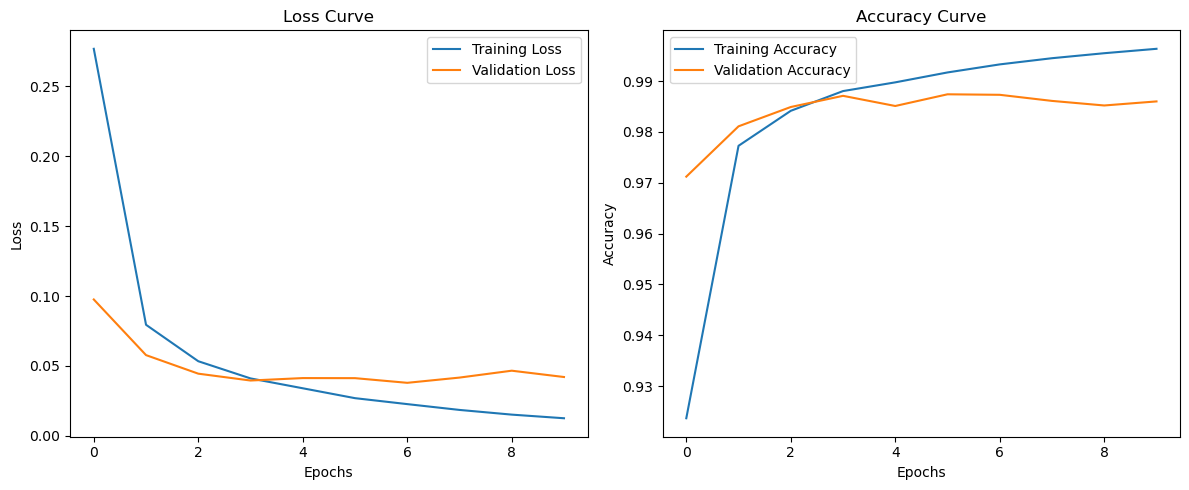

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


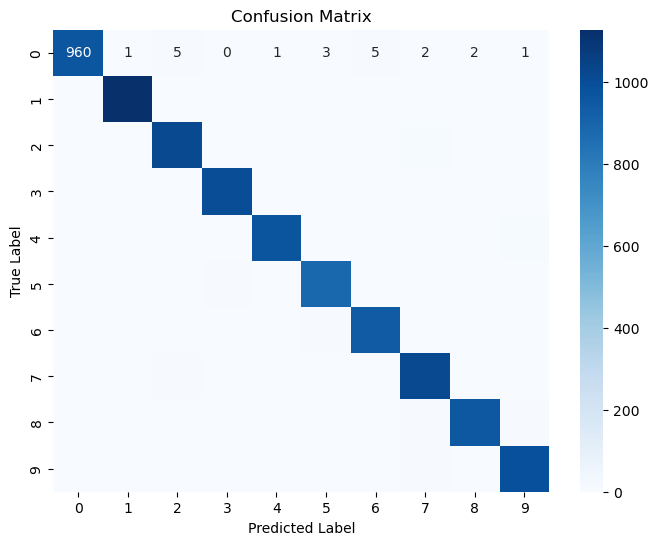

Accuracy: 0.99, Error: 1.40


In [32]:
if __name__ == "__main__":
 
    # Build the model
    model = convolutional_model()

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

    # Visualize the training results
    plot_training_history(history)
    plot_confusion_matrix(model, X_test, y_test)

    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Accuracy: {accuracy:.2f}, Error: {100 - accuracy * 100:.2f}")

- Training Curves: Help identify overfitting or underfitting during training.
- Confusion Matrix: Highlights model strengths and weaknesses in classifying individual digits.
- Evaluation Metrics: Quantify overall performance with accuracy and error rate.

Observation:

1. Training Results:
- The model's accuracy improved steadily across 10 epochs, reaching 99.63% accuracy by the last epoch.
- Training loss decreased consistently, showing good convergence.

2. Validation Results:
- The validation accuracy remained stable, ending at 98.60%.
- Validation loss hovered slightly higher than the training loss, but the difference suggests minimal overfitting.

3. Final Test Results:
- Accuracy: 99% on the test set, indicating strong generalization performance.
- Error Rate: 1.40%, which is exceptionally low for a single-layer CNN on the MNIST dataset.


------------------------------------------


<a id='item43'></a>


## Convolutional Layer with two sets of convolutional and pooling layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [38]:
def double_convolutional_model():
    
    # create the model
    model = Sequential()
    # First Convolutional Layer
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the data for the fully connected layer
    model.add(Flatten())
    # Fully connected layer with 100 neurons
    model.add(Dense(100, activation='relu'))
     # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

### Reusable Utility Functions and Main Workflow 


In [41]:
# Function to plot the training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [43]:
# Function to plot the confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    predictions = np.argmax(model.predict(X_test), axis=1)
    true_labels = np.argmax(y_test, axis=1)
    cm = confusion_matrix(true_labels, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

/home/62f9b1cc-b39d-4589-817c-ad7dac426285/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2025-01-10 10:03:35.681339: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


300/300 - 18s - 60ms/step - accuracy: 0.8715 - loss: 0.4694 - val_accuracy: 0.9592 - val_loss: 0.1398
Epoch 2/10
300/300 - 27s - 90ms/step - accuracy: 0.9630 - loss: 0.1276 - val_accuracy: 0.9699 - val_loss: 0.0934
Epoch 3/10
300/300 - 15s - 51ms/step - accuracy: 0.9726 - loss: 0.0905 - val_accuracy: 0.9761 - val_loss: 0.0772
Epoch 4/10
300/300 - 22s - 72ms/step - accuracy: 0.9784 - loss: 0.0719 - val_accuracy: 0.9811 - val_loss: 0.0589
Epoch 5/10
300/300 - 20s - 66ms/step - accuracy: 0.9817 - loss: 0.0603 - val_accuracy: 0.9834 - val_loss: 0.0495
Epoch 6/10
300/300 - 16s - 54ms/step - accuracy: 0.9838 - loss: 0.0522 - val_accuracy: 0.9832 - val_loss: 0.0483
Epoch 7/10
300/300 - 20s - 66ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9861 - val_loss: 0.0421
Epoch 8/10
300/300 - 22s - 72ms/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9871 - val_loss: 0.0426
Epoch 9/10
300/300 - 19s - 65ms/step - accuracy: 0.9879 - loss: 0.0388 - val_accuracy: 0.9867 - val_loss: 0

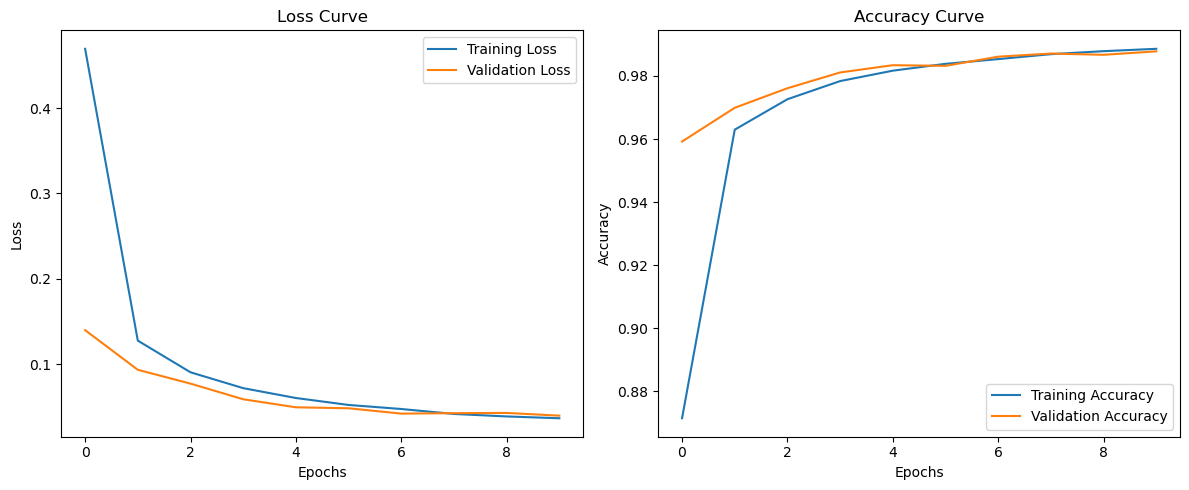

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


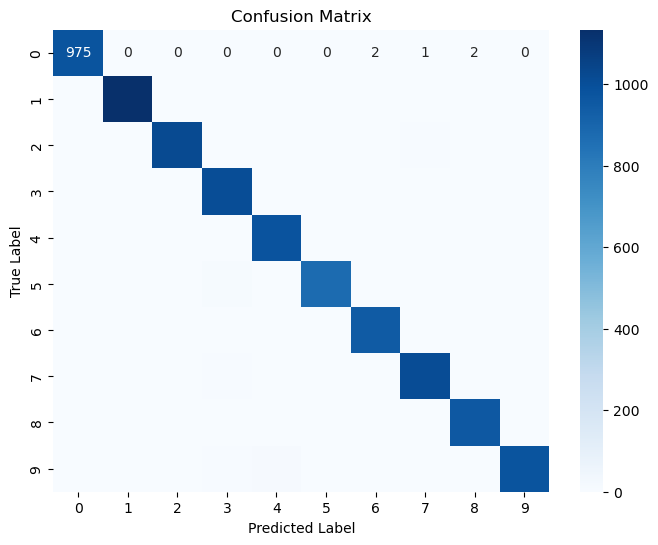

Accuracy: 0.99, Error: 1.22


In [45]:
# Main script
if __name__ == "__main__":
    # Load and preprocess the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train, X_test = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0, X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_train, y_test = to_categorical(y_train), to_categorical(y_test)

    # Get the number of classes
    num_classes = y_test.shape[1]

    # Build the model
    model = double_convolutional_model()

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

    # Visualize the training results
    plot_training_history(history)
    plot_confusion_matrix(model, X_test, y_test)

    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Accuracy: {accuracy:.2f}, Error: {100 - accuracy * 100:.2f}")

Observation:

1. Training Results:
- The model’s accuracy improved consistently across the 10 epochs, reaching 98.86% by the final epoch.
- Training loss showed a steady decrease, indicating effective learning and model convergence.

2. Validation Results:
- The validation accuracy remained stable and ended at 98.78%, showing that the model generalized well.
- Validation loss was slightly higher than the training loss, suggesting minimal overfitting.

3. Final Test Results:
- Test Accuracy: 99% on the test set, demonstrating the model's strong performance and ability to generalize well.
- Test Error Rate: 1.22%, indicating very low error for a two-layer CNN on the MNIST dataset, making it an efficient and reliable model for image classification tasks.

### Conclusion:

- Both models performed exceptionally well on the MNIST dataset, achieving over 99% accuracy on the test set.
- While the single-layer CNN performed slightly better in terms of validation accuracy, the two-layer CNN demonstrated a very similar performance with slightly improved generalization.
- Both models offer a highly efficient approach to image classification, with low error rates and fast convergence, making them ideal for tasks involving handwritten digit recognition.